Users can easily access and change the battery design parameters in the model, such as electrode porosity, thickness, areal density, etc.

To achieve a higher energy density, one of the methods is to have cells with thick electrode. In this example, we will study how will the cell cost vary with electrode thickness.

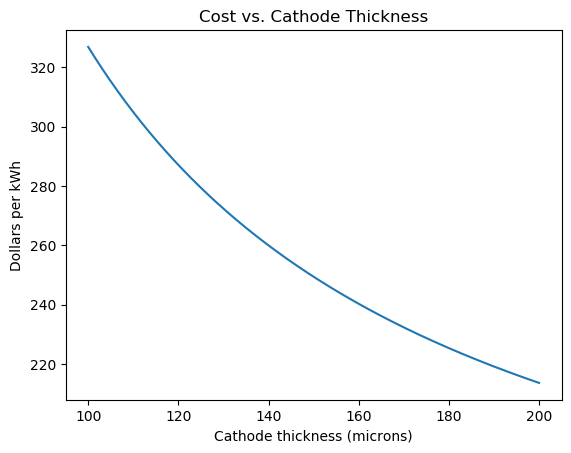

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [1]:
include("../src/PBCM.jl")

cell_general = cell()
cell_design_op = cylindrical_cell_designer(cell_general)
cost = cost_default()
cell_general, cost = convert_all(cell_general, cost, mult)

using PyPlot

    ###################################################### USD/kWh vs Thickness Cathode  ######################################################

param_x = []
param_y = []

cost.cell_costs.cathode.AM[1]   = 17.0
cell_general.cathode.por        = 0.4

for i in range(100, 200, length=1000)
    # cost.material.pos_AM[1] = i
    cell_general.cathode.th = converter(i, mult.pos_th)
    dollars_per_kWh, mfg_capacity = cost_calc(cell_general, cost, system="Cell", cost_verbosity=0)
    append!(param_y, dollars_per_kWh)
    append!(param_x, i)
end

# print(param_y)

clf()
plot(param_x, param_y)
xlabel(String("Cathode thickness (microns)"))
ylabel("Dollars per kWh")
title("Cost vs. Cathode Thickness")
figure(2)

The graph above reflects the change of battery manufacturing cost with the thickness of the cathode electrode.